In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Analisis Dataset Airbnb Bangkok

**Latar Belakang** 

Airbnb adalah sebuah platform online yang memfasilitasi penyewaan tempat tinggal sementara. Melalui situs web dan aplikasi mereka, pengguna dapat mencari dan memesan berbagai jenis tempat menginap, seperti rumah, apartemen, kamar, atau bahkan villa.

Para pemilik properti, yang disebut "host," dapat mendaftarkan tempat mereka di Airbnb dan menentukan harga serta aturan sewa. Sementara itu, tamu dapat melihat ulasan dari tamu sebelumnya, melihat foto, dan membandingkan berbagai pilihan sebelum memutuskan tempat menginap.

**Permasalahan**

Airbnb memperoleh pendapatan utamanya melalui biaya layanan yang dikenakan kepada tamu dan tuan rumah. Biaya ini biasanya merupakan persentase dari total biaya sewa, yang membantu platform ini untuk menutupi biaya operasional dan memberikan layanan kepada pengguna. Oleh karena itu, untuk meningkatkan pendapatan, penting bagi Airbnb untuk meningkatkan jumlah pemesanan. Semakin banyak pemesanan yang dilakukan, semakin banyak biaya layanan yang dapat diperoleh.

Analisis data ini berguna untuk membantu pihak Airbnb dan "host", untuk meningkatkan jumlah pemesanan dengan menganalisis preferensi pengguna, berikut merupakan pertanyaan yang ingin dijawab dalam analisis ini:
1. Apa saja faktor yang mempengaruhi harga sewa di Bangkok?
2. Bagaimana preferensi pengguna dalam memesan tempat tinggal di Bangkok?

# 1. Data Understanding dan Data Cleaning

Dalam bagian ini data yang ada dipelajari dan dibersihkan untuk analisis data.

## 1.1. Membaca Data

Membaca data dari file csv dengan dataframe dan informasi datanya.

In [2]:
#Membaca data csv
df=pd.read_csv('Airbnb Listings Bangkok.csv')
display(df.head(5),df.shape)

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


(15854, 17)

Terdapat 15.854 baris data dengan 17 kolom. `Kolom Unnamed: 0` didrop dan tipe data kolom `last_review` diubah menjadi 'datetime'.

In [3]:
#Mengubah kolom 'last_review' menjadi date time
df['last_review']=pd.to_datetime(df['last_review'])
#Menghapus kolom 'Unnamed: 0'
df.drop(columns='Unnamed: 0',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15854 non-null  int64         
 1   name                            15846 non-null  object        
 2   host_id                         15854 non-null  int64         
 3   host_name                       15853 non-null  object        
 4   neighbourhood                   15854 non-null  object        
 5   latitude                        15854 non-null  float64       
 6   longitude                       15854 non-null  float64       
 7   room_type                       15854 non-null  object        
 8   price                           15854 non-null  int64         
 9   minimum_nights                  15854 non-null  int64         
 10  number_of_reviews               15854 non-null  int64         
 11  la

## 1.2. Data Understanding

Berikut merupakan pengertian dari tiap-tiap kolom:
|Nama Kolom|Arti|
|--|--|
|id|ID listing|
|name|Nama listing|
|host_id|ID host listing|
|host_name|Nama host listing|
|neighbourhood|Daerah lokasi|
|latitude|Garis lintang lokasi|
|longitude|Garis bujur lokasi|
|room_type|Tipe kamar|
|price|Harga per hari (Baht)|
|minimum_nights|Minimal malam sewa|
|number_of_reviews|Jumlah review|
|last_review|Tanggal review terakhir|
|reviews_per_month|Jumlah review per bulan|
|calculated_host_listings_count|Jumlah listing yang dimiliki oleh host di wilayah yang sama|
|availability_365|Ketersediaan listing kedepan (Hari)|
|number_of_reviews_ltm|Jumlah review setahun terakhir|

Berikut merupakan nilai unik dari tiap variabel:

In [4]:
# data unik di tiap variabel
isi = []
for col in df.columns :
    isi.append( [col, df[col].nunique(), df[col].unique()])

tabel = pd.DataFrame(columns=['Column', 'Number of Unique', 'Values'],data=isi)
tabel

,Column,Number of Unique,Values
0,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, ..."
1,name,14794,"[Nice room with superb city view, Easy going l..."
2,host_id,6659,"[120437, 120541, 123784, 153730, 610315, 21296..."
3,host_name,5312,"[Nuttee, Emy, Familyroom, Sirilak, Kasem, Wimo..."
4,neighbourhood,50,"[Ratchathewi, Bang Na, Bang Kapi, Din Daeng, B..."
5,latitude,9606,"[13.75983, 13.66818, 13.75232, 13.78823, 13.76..."
6,longitude,10224,"[100.54134, 100.61674, 100.62402, 100.57256, 1..."
7,room_type,4,"[Entire home/apt, Private room, Hotel room, Sh..."
8,price,3040,"[1905, 1316, 800, 1286, 1000, 1558, 1461, 700,..."
9,minimum_nights,86,"[3, 1, 60, 7, 250, 2, 15, 30, 28, 21, 27, 4, 1..."


Dari tabel diatas didapatkan informasi:
1. Banyak host yang memiliki lebih dari 1 listing, ditandai oleh jumlah `id` unik lebih banyak dari `host_id`.
2. Terdapat nama host yang sama namun berbeda host, ditandai oleh jumlah `host_id` unik lebih sedikit dari `host_name` unik.
3. Terdapat 50 district, terlihat pada kolom `neighbourhood`.
4. Terdapat 4 jenis tipe ruangan, terlihat pada kolom `room_type`


Untuk kolom numerikal dapat dihitung statistika deskriptif sebagai berikut:

In [5]:
df[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


Dari tabel diatas didapatkan informasi:
1. Terdapat nilai `price` yang 0.
2. Range `minimum_nights` dari 1 hari hingga lebih dari 3 tahun.
3. Setidaknya 50% dari listing tidak memiliki review sejak 1 tahun lalu, dilihat dari median dari kolom `number_of_reviews_ltm` adalah 0.
4. Nilai `price` termahal adalah 1.100.000 Baht per hari.
5. Rata-rata setiap host memiliki 13,89 listing.

Pengecekan jumlah listing dengan harga 0:


In [6]:
len(df[df['price']==0])

1

Karena jumlah listing dengan harga 0 hanya 1 maka dapat di drop.

In [7]:
df=df[df['price']!=0]

Untuk kolom kategorikal dapat dihitung statistika deskriptif sebagai berikut:

In [8]:
df.describe(include='object')

,name,host_name,neighbourhood,room_type
count,15845,15852,15853,15853
unique,14793,5311,50,4
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt
freq,45,228,2152,8912


Dari tabel diatas didapatkan informasi:
1. Jumlah listing terbanyak berasal dari district **'Vadhana'**.
2. Tipe ruangan terbanyak adalah **'Entire home/apt'**.

## 1.3. Missing Value

Mengecek jumlah missing values pada setiap kolom.

In [9]:
#Menghitung missing values
df.isna().sum()

id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5789
reviews_per_month                 5789
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

Terdapat missing value pada kolom `name`, `host_name`, `last_review`, dan `reviews_per_month`. Missing values pada kolom `name` dan `host_name` diisi dengan '-'.

In [10]:
#Mengisi missing values kolom name dan host_name dengan '-'
df['name']=df['name'].fillna('-')
df['host_name']=df['host_name'].fillna('-')
df.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5789
reviews_per_month                 5789
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

Kemudian mengecek apakah missing values pada kolom `last_review` dan `reviews_per_month` dikarenakan listing tidak memiliki review sama sekali.

In [11]:
#Mengecek apakah missing value pada kolom last_review dan reviews_per_month memiliki number_of_reviews sama dengan 0.
display(len(df[(df['last_review'].isna())&(df['number_of_reviews']==0)]),len(df[(df['reviews_per_month'].isna())&(df['number_of_reviews']==0)]))

5789

5789

Didapatkan seluruh 5.789 missing values dari kolom `last_review` dan `reviews_per_month` memiliki jumlah total review sama dengan nol, maka missing values pada kolom `reviews_per_month` diisi dengan nol, dan missing values dari kolom `last_review` dibiarkan terlebih dahulu.

In [12]:
#Mengisi missing values kolom reviews_per_month dengan 0
df['reviews_per_month']=df['reviews_per_month'].fillna(0)
#Sedangkan untuk missing values pada kolom last_review dibiarkan dulu
df.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5789
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

## 1.4. Outlier

Berikut merupakan tabel banyaknya outlier disetiap kolom.

In [13]:
kolom_numerikal=df[['price', 'minimum_nights','number_of_reviews', 'reviews_per_month', 'number_of_reviews_ltm']].columns
tabel_outlier=pd.DataFrame(columns=['Median','Batas Bawah','Batas Atas','Jumlah Outlier','Persentase Outlier (%)'])
for kolom in kolom_numerikal:
    Q1=df[kolom].quantile(0.25)
    Q2=df[kolom].quantile(0.5)
    Q3=df[kolom].quantile(0.75)
    batas_atas=Q3+1.5*(Q3-Q1)
    batas_bawah=Q1-1.5*(Q3-Q1)
    tabel_outlier.loc[kolom]=[df[kolom].median(),batas_bawah,batas_atas,len(df[(df[kolom]>batas_atas)|(df[kolom]<batas_bawah)]),len(df[(df[kolom]>batas_atas)|(df[kolom]<batas_bawah)])/len(df)*100]
display(tabel_outlier.round(2))

,Median,Batas Bawah,Batas Atas,Jumlah Outlier,Persentase Outlier (%)
price,1429.00,-1393.50,4722.50,1403.0,8.85
minimum_nights,1.00,-8.00,16.00,3168.0,19.98
number_of_reviews,2.00,-19.50,32.50,2240.0,14.13
reviews_per_month,0.09,-1.01,1.68,1471.0,9.28
number_of_reviews_ltm,0.00,-4.50,7.50,2219.0,14.00


Didapatkan bahwa di setiap kolom terdapat outlier yang cukup banyak. Kemudian di cek statistika deskriptif dari kolom numerikal.

In [14]:
df[['price', 'minimum_nights','number_of_reviews', 'reviews_per_month', 'number_of_reviews_ltm']].describe().T

,count,mean,std,min,25%,50%,75%,max
price,15853.0,3217.906895,24972.896932,278.0,900.0,1429.00,2429.00,1100000.00
minimum_nights,15853.0,15.293257,50.816496,1.0,1.0,1.00,7.00,1125.00
number_of_reviews,15853.0,16.655207,40.614397,0.0,0.0,2.00,13.00,1224.00
reviews_per_month,15853.0,0.516211,0.952774,0.0,0.0,0.09,0.67,19.13
number_of_reviews_ltm,15853.0,3.481738,8.917176,0.0,0.0,0.00,3.00,325.00


Dari kolom `price` didapatkan bahwa nilai maksimalnya adalah 1.100.000 Baht atau sebesar 504 juta rupiah, sedangkan nilai quartil tiganya hanya 2.429 Baht atau sebesar 1,1 juta rupiah, oleh karena itu outlier dari price di drop dikarenakan harga yang signifikan berbeda jauh dapat menyebabkan adanya perbedaan karakteristik dibandingkan dengan yang listing yang lain.

In [15]:
#Data outlier
numerikal=['price']
index_outlier=[]
for i in numerikal:
    q1, q3 = df[i].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower = q1 - iqr * 1.5
    upper = q3 + iqr * 1.5
    index_outlier+=list(df[(df[i]>upper)|(df[i]<lower)].index)
index_outlier=list(set(index_outlier))
print(f'Percentase baris dengan outlier : {round(len(index_outlier)/len(df)*100,3)}%')
df.drop(index_outlier,inplace=True)

Percentase baris dengan outlier : 8.85%


## 1.5. Data Duplicate

Mengecek apakah terdapat data duplikat pada setiap baris dan pada kolom `id`.

In [16]:
display(df.duplicated().sum(),df['id'].duplicated().sum())

0

0

Tidak terdapat data duplikat.

# 2. Data Preprocessing

## 2.1. Kolom `name`

Sebelum kolom `name` dapat dianalisis, data harus diolah terlebih dahulu dengan membuat fungsi untuk membersihkan data dimana prosesnya adalah :
1. Menghapus karakter non huruf
2. Menentukan apakah karakter merupakan karakter latin atau tidak

In [17]:
import unicodedata
def latin(input):
    latin='latin'
    kalimat=[]
    #Menghapus karakter non huruf
    for karakter in input:
        if unicodedata.category(karakter)[0]=='L':
            kalimat.append(karakter)
        else:
            pass
    kalimat=''.join(kalimat).lower()
    for i in kalimat:
        if unicodedata.category(i) not in ['Ll','Zs']:
            latin='non latin'
    return latin


In [18]:
df['name_latin']=df['name'].apply(latin)

## 2.2. Kolom `minimum_nights`

Kolom `minimum_nights` akan dibagi menjadi 2 kelas yaitu:

|Label|Arti|
|--------|-----|
|short|1-7 hari|
|long|>7 hari|

Kolom `minimum_nights` dikelompokan 2 dikarenakan memiliki target pasar yang berbeda, orang yang menyewa jangka pendek biasanya adalah wisatawan atau orang yang berkeperluan bisnis, sedangkan orang yang menyewa jangka panjang biasanya adalah mahasiswa, pekerja sementara, dan orang yang baru di kota.


In [19]:
def minimum_nights_class(x):
        if x<=7:
            return 'short'
        else:
            return 'long'

In [20]:
df['minimum_nights_class']=df['minimum_nights'].apply(minimum_nights_class)

## 2.3. Mendrop Kolom yang Tidak Perlu

Kolom yang tidak diperlukan untuk analisis didrop, kolom yang di drop antara lain adalah : 
* `last_review` : Dikarenakan sudah ada variabel yang menjelaskan apakah ada review sejak 1 tahun terakhir yaitu kolom `number_of_reviews_ltm`
* `name` : Dikarenakan sudah diwakilkan oleh kolom `name_latin`
* `host_name` : Host name tidak masuk dalam analisis
* `calculated_host_listings_count` : Jumlah listing dari host tidak masuk dalam analisis
* `availability_365` : Ketersediaan kamar dapat dipengaruhi oleh di blok oleh host atau memang terisi, sehingga kolom kurang bisa menjelaskan banyaknya pesanan

In [21]:
df.drop(columns=['last_review','name','host_name','calculated_host_listings_count','availability_365'],inplace=True)

In [22]:
df.head(5)

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,number_of_reviews_ltm,name_latin,minimum_nights_class
0,27934,120437,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,0.50,0,latin,short
1,27979,120541,Bang Na,13.66818,100.61674,Private room,1316,1,0,0.00,0,latin,short
2,28745,123784,Bang Kapi,13.75232,100.62402,Private room,800,60,0,0.00,0,latin,long
3,35780,153730,Din Daeng,13.78823,100.57256,Private room,1286,7,2,0.03,1,latin,short
4,941865,610315,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,0.00,0,latin,short


# 3. Statistika Deskriptif

## 3.1. Variabel Kategorikal

### a. Variabel `neighbourhood`

,id,percentage (%)
neighbourhood,,
Khlong Toei,1887,13.058824
Vadhana,1769,12.242215
Ratchathewi,1059,7.328720
Huai Khwang,1031,7.134948
Sathon,762,5.273356
Bang Rak,738,5.107266
Phra Nakhon,585,4.048443
Phra Khanong,540,3.737024
Chatu Chak,522,3.612457


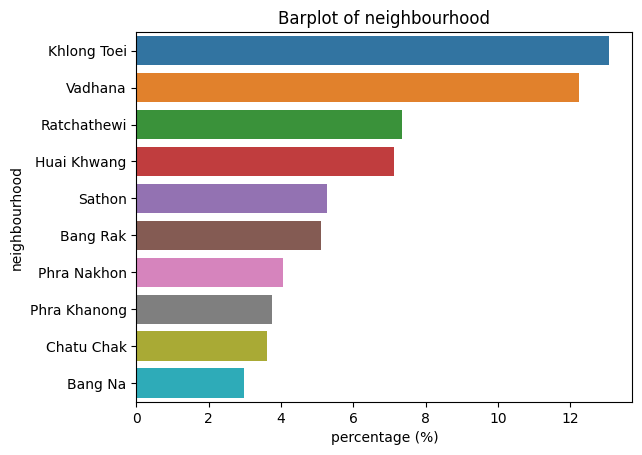

In [23]:
tab=df[['neighbourhood','id']].groupby('neighbourhood').count().sort_values('id',ascending=False)
tab['percentage (%)']=tab['id']/len(df)*100
sns.barplot(data=tab.head(10),x='percentage (%)',y=tab.head(10).index,palette='tab10',hue=tab.head(10).index)
plt.title('Barplot of neighbourhood')
tab.head(10)

District dengan listing terbanyak berasal dari **Khlong Toei** yaitu sebesar 1.887 atau 13,06% dari total listing.

### b. Variabel `room_type`

,id,percentage (%)
room_type,,
Entire home/apt,8107,56.103806
Private room,5281,36.546713
Hotel room,553,3.826990
Shared room,509,3.522491


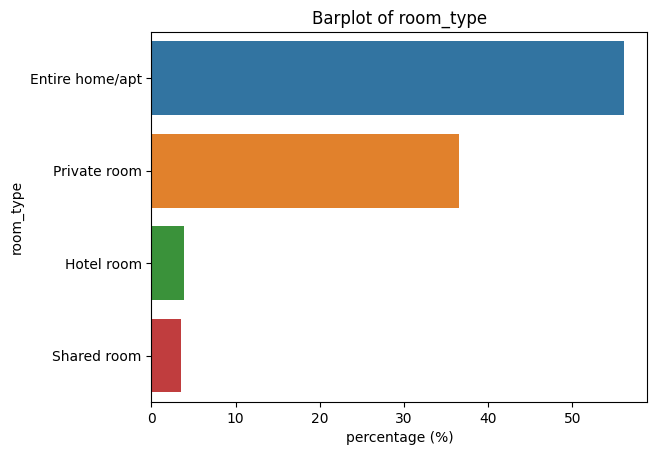

In [24]:
tab=df[['room_type','id']].groupby('room_type').count().sort_values('id',ascending=False)
tab['percentage (%)']=tab['id']/len(df)*100
sns.barplot(data=tab,x='percentage (%)',y=tab.index,palette='tab10',hue=tab.index)
plt.title('Barplot of room_type')
tab.head(15)

Jenis kamar dengan listing terbanyak adalah tipe **Entire home/apt** yaitu sebesar 8.107 atau 56,10% dari total listing.

### c. Variabel `time_since_last_review`

,id,percentage (%)
name_latin,,
latin,12609,87.259516
non latin,1841,12.740484


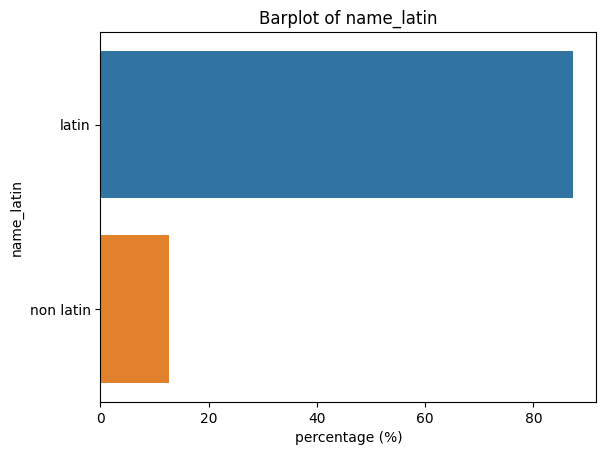

In [25]:
tab=df[['name_latin','id']].groupby('name_latin').count().sort_values('id',ascending=False)
tab['percentage (%)']=tab['id']/len(df)*100
sns.barplot(data=tab,x='percentage (%)',y=tab.index,palette='tab10',hue=tab.index)
plt.title('Barplot of name_latin')
tab.head(15)

Nama listing mayoritas menggunakan tulisan **latin** yaitu sebesar 12.609 atau 87,26% dari total listing.

### d. Variabel `minimum_nights_class`

,id,percentage (%)
minimum_nights_class,,
short,10893,75.384083
long,3557,24.615917


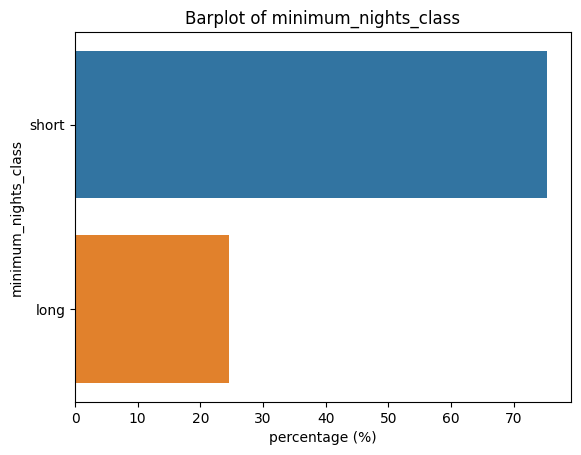

In [26]:
tab=df[['minimum_nights_class','id']].groupby('minimum_nights_class').count().sort_values('id',ascending=False)
tab['percentage (%)']=tab['id']/len(df)*100
sns.barplot(data=tab,x='percentage (%)',y=tab.index,palette='tab10',hue=tab.index)
plt.title('Barplot of minimum_nights_class')
tab.head(15)

Listing mayoritas memiliki malam minimum sewa yang **short** yaitu sebesar 10.893 atau 75,38% dari total listing.

## 3.2. Variabel Numerikal

Didapatkan cukup banyak outlier dalam data, dimana yang terbesar ada di variabel `minimum_nights` yaitu sebesar 19,98% dari total listing. Outlier-outlier pada data tidakndihilangkan saat analisis agar tidak ada informasi yang terbuang.

### b. Tabel Statistika Deskriptif

Pada bagian dibawah dilakukan eksplorasi data secara umum yang bertujuan untuk mengetahui informasi data meliputi :
*   Count (Jumlah Data)
*   Mean (nilai rata-rata setiap data)
*   Std (Standard Deviasi)
*   min (nilai paling kecil dari setiap variabel)
*   Quartil (pembagian data setiap kuartal 25%)
*   max (nilai maksimal pada setiap variabel)

In [27]:
df[['price', 'minimum_nights','number_of_reviews', 'reviews_per_month', 'number_of_reviews_ltm']].describe().T

,count,mean,std,min,25%,50%,75%,max
price,14450.0,1563.720761,942.560147,278.0,862.25,1300.0,2000.00,4720.00
minimum_nights,14450.0,15.383253,49.163431,1.0,1.00,1.0,7.00,1125.00
number_of_reviews,14450.0,17.091142,41.493117,0.0,0.00,2.0,14.00,1224.00
reviews_per_month,14450.0,0.524210,0.960015,0.0,0.00,0.1,0.69,19.13
number_of_reviews_ltm,14450.0,3.517647,8.981637,0.0,0.00,0.0,3.00,325.00


### c. Uji Normalitas dan Skewness

Karena data yang dimiliki kini sebanyak 15.853 baris oleh karena itu digunakan **Uji D'Agostino-Pearson** yang dapat memberikan hasil yang lebih akurat untuk data yang berjumlah lebih dari 5.000.

In [28]:
from scipy.stats import normaltest
from scipy import stats

kolom=df[['price', 'minimum_nights','number_of_reviews', 'reviews_per_month', 'number_of_reviews_ltm']].columns
hasil=pd.DataFrame(columns=['P-Value','Keputusan','Keterangan','Skewness'])
for k in kolom:
    skew=stats.skew(df[k])
    stat, pvalue = normaltest(
        df[k]
    )
    if pvalue<=0.05:
        ket='Tidak terdistribusi normal'
        kep='Tolak H0'
    else:
        ket='Terdistribusi Normal'
        kep='Gagal tolak H0'
    hasil.loc[k]=[pvalue,kep,ket,skew]
display(hasil)

,P-Value,Keputusan,Keterangan,Skewness
price,0.0,Tolak H0,Tidak terdistribusi normal,1.137272
minimum_nights,0.0,Tolak H0,Tidak terdistribusi normal,8.082185
number_of_reviews,0.0,Tolak H0,Tidak terdistribusi normal,6.260124
reviews_per_month,0.0,Tolak H0,Tidak terdistribusi normal,4.714518
number_of_reviews_ltm,0.0,Tolak H0,Tidak terdistribusi normal,10.068430


Didapatkan bahwa seluruh variabel numerikal tidak terdistribusi normal dengan skewness positif.

### d. Histogram

Untuk melihat persebaran data digunakan histogram sebagai berikut:

C:\Users\kifla\AppData\Local\Temp\ipykernel_7104\1976806712.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[f'{column}_standardized'] = df2[column].apply(lambda x: (x-m)/s)
C:\Users\kifla\AppData\Local\Temp\ipykernel_7104\1976806712.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[f'{column}_standardized'] = df2[column].apply(lambda x: (x-m)/s)
C:\Users\kifla\AppData\Local\Temp\ipykernel_7104\1976806712.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

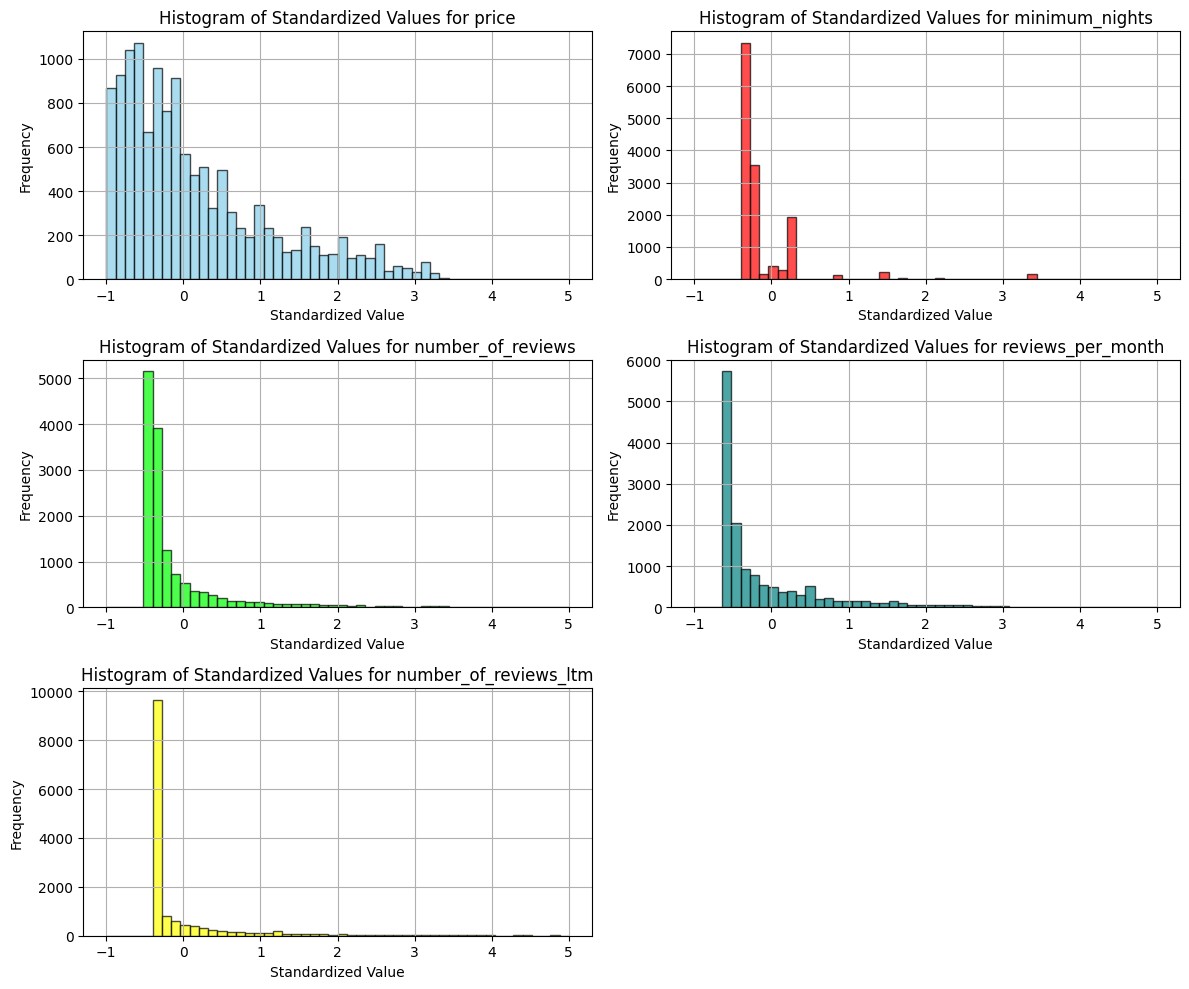

In [29]:
# Sample DataFrame with multiple numerical columns
df2 = df[['price', 'minimum_nights','number_of_reviews', 'reviews_per_month', 'number_of_reviews_ltm']]
num_cols = len(df2.columns)

# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
# Loop through each column, standardize and plot histogram
color=('skyblue','red','Lime','Teal','yellow')

for i, column in enumerate(df2.columns):
    # Standardize the column
    m=df2[column].mean()
    s=df2[column].std()
    df2[f'{column}_standardized'] = df2[column].apply(lambda x: (x-m)/s)
    
    # Plot histogram

    ax = axes[i//2,i%2]
    ax.hist(df2[f'{column}_standardized'], bins=50, range=(-1, 5), edgecolor='k', alpha=0.7,color=color[i])
    ax.set_xlabel('Standardized Value')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of Standardized Values for {column}')
    ax.grid(True)
axes[2,1].axis('off')
# Adjust layout
plt.tight_layout()
plt.show()


Sesuai dengan hasil uji dan nilai skewness, data tidak berdistribusi normal dan cenderung memiliki right-skew.

### e. Korelasi

Kemudian hubungan antara variabel-variabel numerik dinilai dengan menggunakan korelasi **spearman**, korelasi **spearman** dipilih karena data tidak berdistribusi normal.

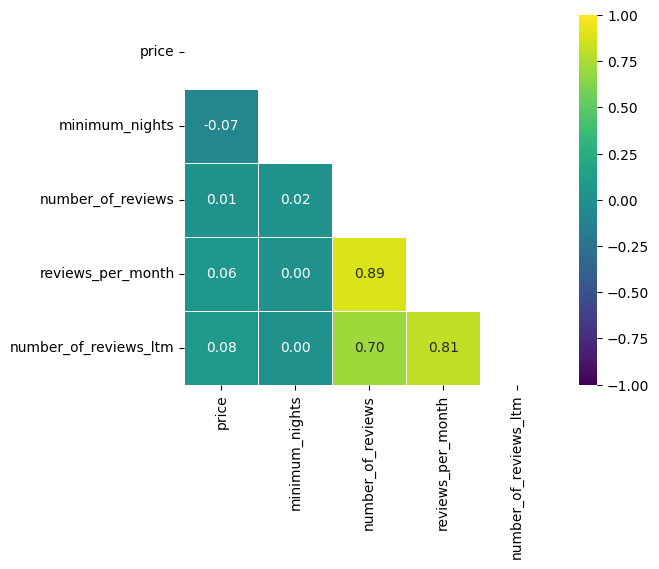

In [30]:
df_corr = df[['price', 'minimum_nights','number_of_reviews', 'reviews_per_month', 'number_of_reviews_ltm']].corr(method = 'spearman')
mask = np.triu(np.ones_like(df_corr, dtype=bool))
sns.heatmap(df_corr, cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5, mask = mask)
plt.show()

Dari korelasi diatas dapat dikatakan :
* Terdapat hubungan berbanding lurus yang **sangat kuat** yang antara variabel `reviews_per_month` dengan variabel `number_of_reviews` dan `number_of_reviews_ltm`.
* Terdapat hubungan berbanding lurus yang **kuat** yang antara variabel `number_of_reviews` dengan variabel `number_of_reviews_ltm`.

# 4. Analisis

## 4.1. Analisis Harga

Analisis harga bertujuan untuk mengetahui variabel apa yang mempengaruhi dan bagaimana variabel tersebut mempengaruhi median harga. Pemilihan median sebagai *measures of central tendency* dikarenakan data tidak terdistribusi normal.

### a. Hubungan harga dengan lokasi

,price
neighbourhood,
Parthum Wan,1946.5
Bang Rak,1753.5
Vadhana,1732.0
Samphanthawong,1714.0
Khlong Toei,1581.0
Ratchathewi,1514.0
Thawi Watthana,1500.0
Taling Chan,1381.0
Yan na wa,1370.0


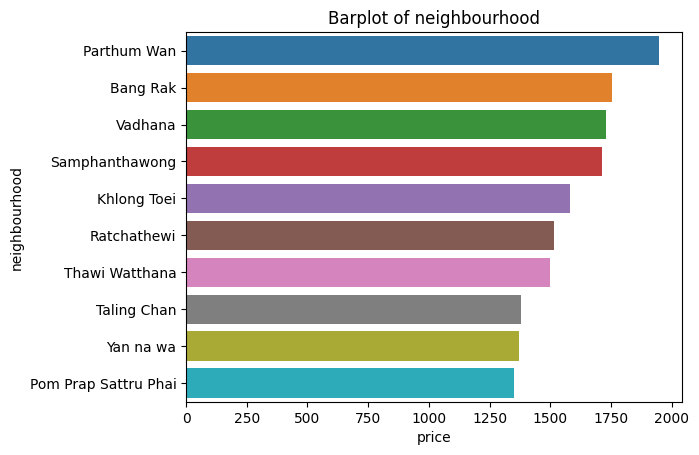

In [31]:
def pivot_price(df,x):
    return df[[x,'price']].groupby(x).median().sort_values('price',ascending=False)\
    
def barplot_price(df):
    sns.barplot(data=df,x='price',y=df.index,palette='tab10',hue=df.index)
    plt.title(f'Barplot of {df.index.name}')    
display(pivot_price(df,'neighbourhood').head(10))
barplot_price(pivot_price(df,'neighbourhood').head(10))

def box_hist(df,x):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    sns.boxplot(x = x, y = 'price', data = df, palette = 'tab10', ax=ax[0],hue=x)
    ax[0].set_title(f'Boxplot price Berdasarkan {x}')
    sns.histplot(df, x="price", hue=x,multiple='layer', bins=9, stat='percent', palette='tab10',ax = ax[1],common_norm=False,kde=True,edgecolor=None,alpha=0.4)
    for line in plt.gca().get_lines():
        if line.get_linestyle() == '-':  # Check if it's a solid line (KDE line)
            line.set_linewidth(2)
    ax[1].set_title(f'Histogram price Berdasarkan {x}')
    ax[1].set_ylabel('Percentage', rotation = 90)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

Didapatkan bahwa nilai median dari price dipengaruhi oleh variabel lokasinya, dimana 5 lokasi dengan harga tertinggi yaitu Parthum Wan, Bang Rak, Vadhana, Samphanthawong,Khlong Toei.

### b. Hubungan antara harga dengan tipe kamar

,price
room_type,
Entire home/apt,1480.0
Hotel room,1467.0
Private room,1177.0
Shared room,500.0


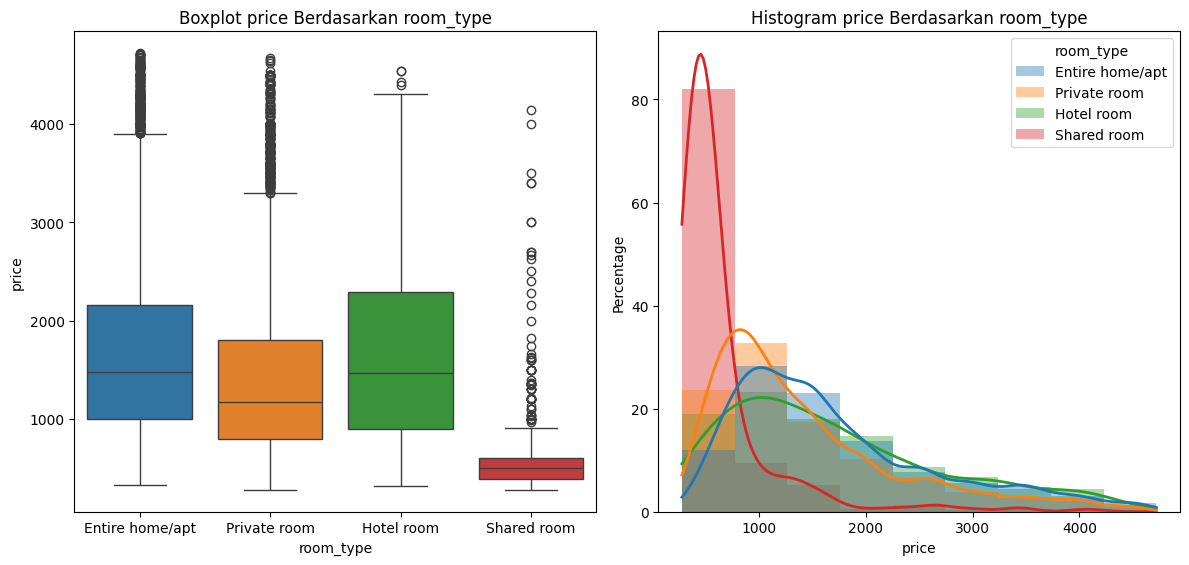

In [32]:
display(pivot_price(df,'room_type').head(15))
box_hist(df,'room_type')

Dapat dilihat secara median harga dari tipe kamar rumah/apartemen adalah yang tertinggi, sedangkan harga hotel memiliki median yang sedikit lebih rendah namun dengan persebaran yang lebih luas, sedangkan untuk tipe kamar 'Private Room' memiliki median yang lebih rendah dan sebarang yang lebih sempit dibandingkan dengan tipe rumah/apartemen, dan yang terakhir tipe 'Shared room' memiliki harga yang jauh lebih rendah dari ketiga tipe lain dengan persebaran yang sempit.

### c. Hubungan antara harga dengan minimum malam sewa

,price
minimum_nights_class,
short,1380.0
long,1200.0


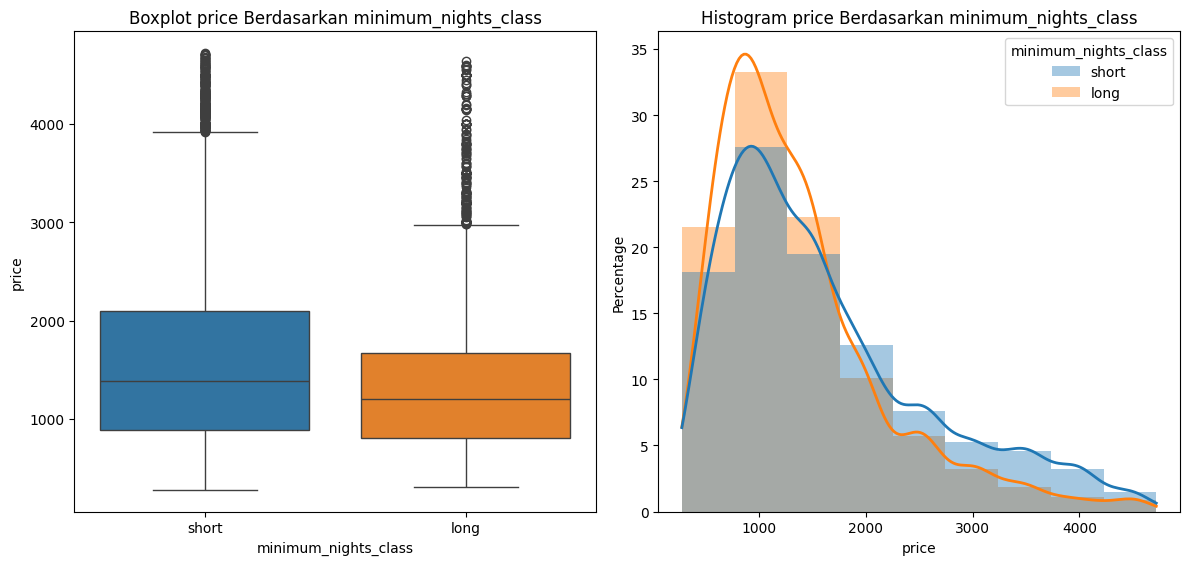

In [33]:
display(pivot_price(df,'minimum_nights_class').head(15))
box_hist(df,'minimum_nights_class')

Didapatkan median harga dari minimum malam sewa panjang lebih rendah jika dibandingkan dengan yang pendek dan memiliki persebaran yang lebih sempit, kemudian persentase jumlah listing minimum malam sewa panjang lebih banyak disekitar harga minimum hingga 1.600 baht, sedangkan untuk harga 1.600 baht keatas lebih besar persentase yang pendek.

### d. Pengelompokan harga

Untuk analisis selanjutnya dibuat klasifikasi harga dengan quartil 1 dan quartil 3 berdasarkan lokasi, berikut merupakan klasifikasinya :

|Label|Arti|
|--|--|
|budget|Harga dibawah Q1 kelompok lokasi|
|standard|Harga diantara Q1 dan Q3 lokasi|
|premium|Harga diatas Q3 kelompok lokasi|

In [34]:
Q3=df[['price','neighbourhood']].groupby(['neighbourhood']).agg(lambda x: x.quantile(0.75))
Q3.rename(columns={'price': 'Q3'}, inplace=True)
Q1=df[['price','neighbourhood']].groupby(['neighbourhood']).agg(lambda x: x.quantile(0.25))
Q1.rename(columns={'price': 'Q1'}, inplace=True)
Klasifikasi = pd.concat([Q3, Q1], axis=1)
Klasifikasi.head()

,Q3,Q1
neighbourhood,,
Bang Bon,2000.00,900.00
Bang Kapi,1500.00,600.00
Bang Khae,1500.00,612.50
Bang Khen,1500.00,600.00
Bang Kho laen,1807.75,825.25


In [35]:
def klasifikasi_price(x):
    n=x['neighbourhood']
    Q1=Klasifikasi.loc[(n)]['Q1']
    Q3=Klasifikasi.loc[(n)]['Q3']
    if Q1==Q3:
        return 'standard'
    elif x['price']>Q3:
        return 'premium'
    elif x['price']>=Q1:
        return 'standard'
    else:
        return 'budget'

In [36]:
df['price_class']=df.apply(klasifikasi_price,axis=1)

## 4.2. Analisis Tingkat Booking Tinggi

### a. Klasifikasi Tingkat Booking

Untuk dapat membedakan mana yang memiliki tingkat booking tinggi dan rendah, digunakan variabel `number_of_reviews_ltm` karena:
1. Tidak terdapat kolom jumlah hari terisi/terbooking dalam satuan waktu.
2. Jumlah review dapat menjadi tolak ukur tingkat booking dikarenakan orang yang dapat mereview hanya orang yang telah sukses memesan dan membayar pesanan di Airbnb. Sehingga jika jumlah booking yang sukses makin banyak, semakin banyak pula peluang review bertambah.
3. Merupakan data terbaru yaitu 1 tahun terakhir dan memiliki jangka waktu yang sama (1 tahun) untuk setiap listing sehingga dapat menjadi tolak ukur banyaknya pesanan dalam satuan waktu.
4. Dapat mewakili variabel `number_of_reviews` dan `reviews_per_month` karena memiliki korelasi yang kuat

Namun variabel `number_of_reviews_ltm` juga memiliki kelemahan, dimana apabila jangka waktu penyewaan tempat tinggal panjang, maka otomatis jumlah penyewa dan review semakin sedikit dikarenakan tempat tinggal diisi oleh orang yang sama dengan waktu yang panjang. Sehingga dalam klasifikasi tingkat booking dipisah antara minimum malam sewa pendek dan panjang. Klasifikasi ini menandai tingkat booking tinggi apabila `number_of_reviews_ltm` berada di 15% tertinggi.

In [37]:
TB=df[['minimum_nights_class', 'number_of_reviews_ltm']].groupby('minimum_nights_class').agg(lambda x: x.quantile(0.85))
TB

,number_of_reviews_ltm
minimum_nights_class,
long,4.0
short,9.0


In [38]:
def booking_rate(x):
    limit=0
    if x['minimum_nights_class']=='short':
        limit=TB.loc[x['minimum_nights_class']]['number_of_reviews_ltm']
        if x['number_of_reviews_ltm']>=limit:
            return 'top 15%'
        else:
            return 'not'

    elif x['minimum_nights_class']=='long':
        limit=TB.loc[x['minimum_nights_class']]['number_of_reviews_ltm']
        if x['number_of_reviews_ltm']>=limit:
            return 'top 15%'
        else:
            return 'not'

In [39]:
df['booking_rate']=df.apply(booking_rate,axis=1)

### b. Analisis Tingkat Booking berdasarkan Harga

,price
booking_rate,
top 15%,1500.0
not,1280.0


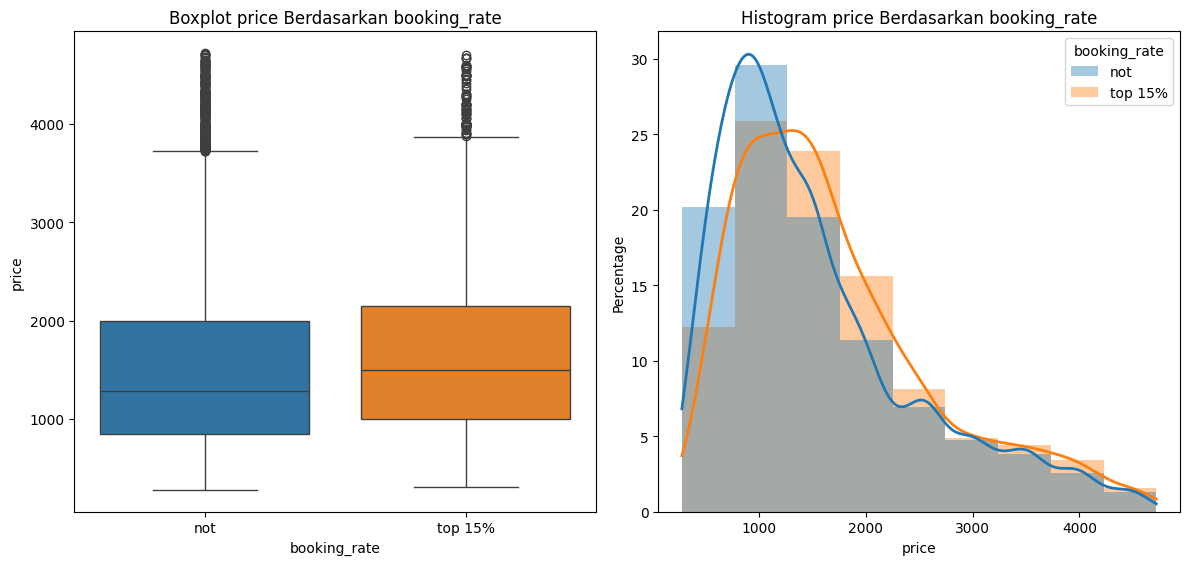

In [49]:
display(pivot_price(df,'booking_rate').head(15))
box_hist(df,'booking_rate')

Didapatkan median harga dari tingkat booking top 15% lebih tinggi dari yang not dengan sebaran yang tidak berbeda jauh.

,premium,standard,budget
short,29.269729,54.240283,16.489988
long,11.627907,61.001789,27.370304


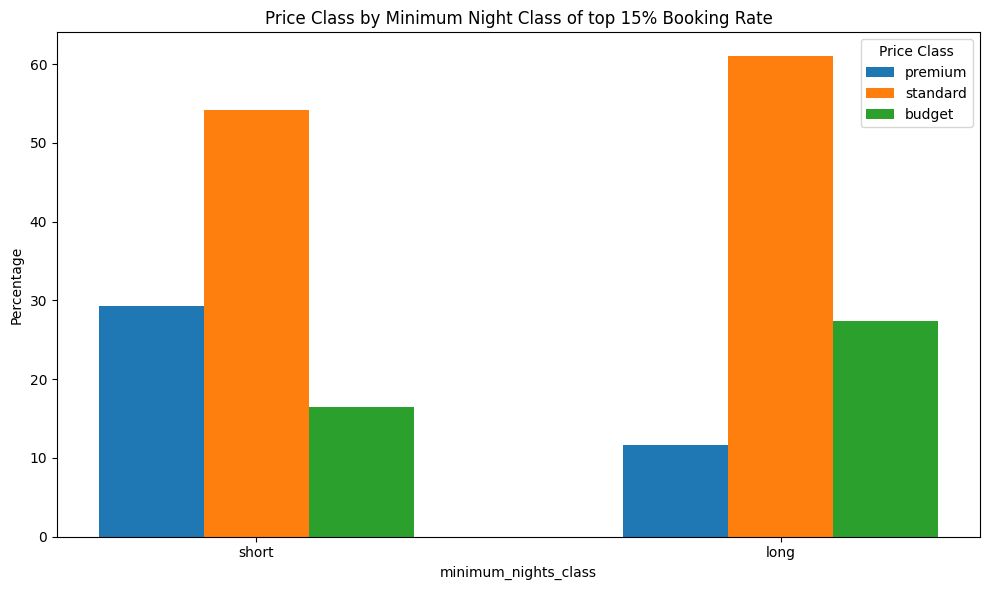

In [40]:
tab=pd.DataFrame(columns=['premium','standard','budget'])
for i in df['minimum_nights_class'].unique():
    a=df[df['booking_rate']=='top 15%']
    count=len(a[a['minimum_nights_class']==i])
    if count!=0:
        premium=len(a[(a['minimum_nights_class']==i)&(a['price_class']=='premium')])/count*100
        standard=len(a[(a['minimum_nights_class']==i)&(a['price_class']=='standard')])/count*100
        budget=len(a[(a['minimum_nights_class']==i)&(a['price_class']=='budget')])/count*100
        
        tab.loc[i]=[premium,standard,budget]
display(tab)
tab
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
# Define the bar width
bar_width = 0.2
index = np.arange(len(tab))  # The label locations
# Plot each product
for i, product in enumerate(tab.columns):
    ax.bar(index + i * bar_width, tab[product], bar_width, label=product)
# Adding labels, title, and legend
ax.set_ylabel('Percentage')
ax.set_xlabel('minimum_nights_class')
ax.set_title('Price Class by Minimum Night Class of top 15% Booking Rate')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(tab.index)
ax.legend(title='Price Class')
plt.tight_layout()
plt.show()

Dari tabel dan grafik diatas didapatkan bahwa:
1. Penyewa jangka pendek lebih suka untuk memesan tempat dengan harga premium dibandingkan budget.
2. Penyewa jangka panjang lebih suka untuk memesan tempat dengan harga budget dibandingkan premium.
3. Penyewa jangka panjang maupun jangka pendek keduanya memiliki preferensi untuk menyewa tempat dengan harga standard.

### c. Analisis Tingkat Booking berdasarkan Tipe Kamar

,Entire home/apt,Private room,Hotel room,Shared room
short,81.272085,16.431095,1.943463,0.353357
long,94.812165,4.830054,0.357782,0.000000


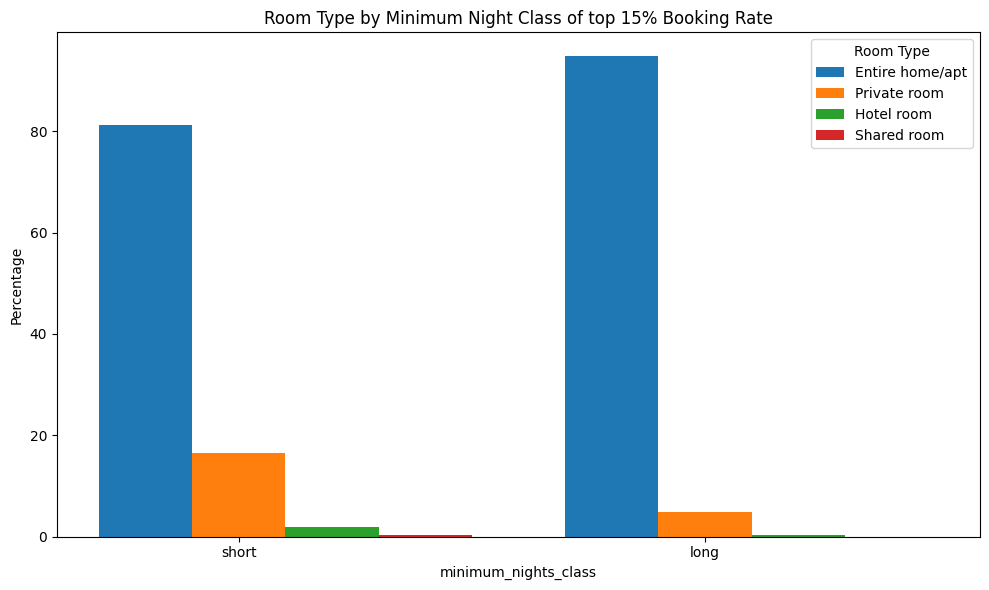

In [41]:
tab=pd.DataFrame(columns=['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'])
for i in df['minimum_nights_class'].unique():
    a=df[df['booking_rate']=='top 15%']
    count=len(a[a['minimum_nights_class']==i])
    if count!=0:
        HA=len(a[(a['minimum_nights_class']==i)&(a['room_type']=='Entire home/apt')])/count*100
        PR=len(a[(a['minimum_nights_class']==i)&(a['room_type']=='Private room')])/count*100
        HR=len(a[(a['minimum_nights_class']==i)&(a['room_type']=='Hotel room')])/count*100
        SR=len(a[(a['minimum_nights_class']==i)&(a['room_type']=='Shared room')])/count*100
        
        tab.loc[i]=[HA,PR,HR,SR]
display(tab)
tab
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
# Define the bar width
bar_width = 0.2
index = np.arange(len(tab))  # The label locations
# Plot each product
for i, product in enumerate(tab.columns):
    ax.bar(index + i * bar_width, tab[product], bar_width, label=product)
# Adding labels, title, and legend
ax.set_ylabel('Percentage')
ax.set_xlabel('minimum_nights_class')
ax.set_title('Room Type by Minimum Night Class of top 15% Booking Rate')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(tab.index)
ax.legend(title='Room Type')
plt.tight_layout()
plt.show()

Dari tabel dan grafik diatas didapatkan bahwa penyewa jangka panjang maupun jangka pendek keduanya memiliki preferensi untuk menyewa tempat dengan tipe rumah/apartemen diikuti dengan private room, hotel room, dan yang terakhir shared room. Kemudian dapat dilihat bahwa penyewa jangka panjang memiliki persentse yang jauh lebih rendah dalam menyewa Private Room dan shared room karena penyewa jangka panjang cenderung memilih untuk tinggal tanpa harus berbagi tempat dengan orang lain.

### d. Analisis Tingkat Booking berdasarkan Nama Listing

,latin,non latin
short,91.931684,8.068316
long,86.583184,13.416816
All,90.607000,9.393000


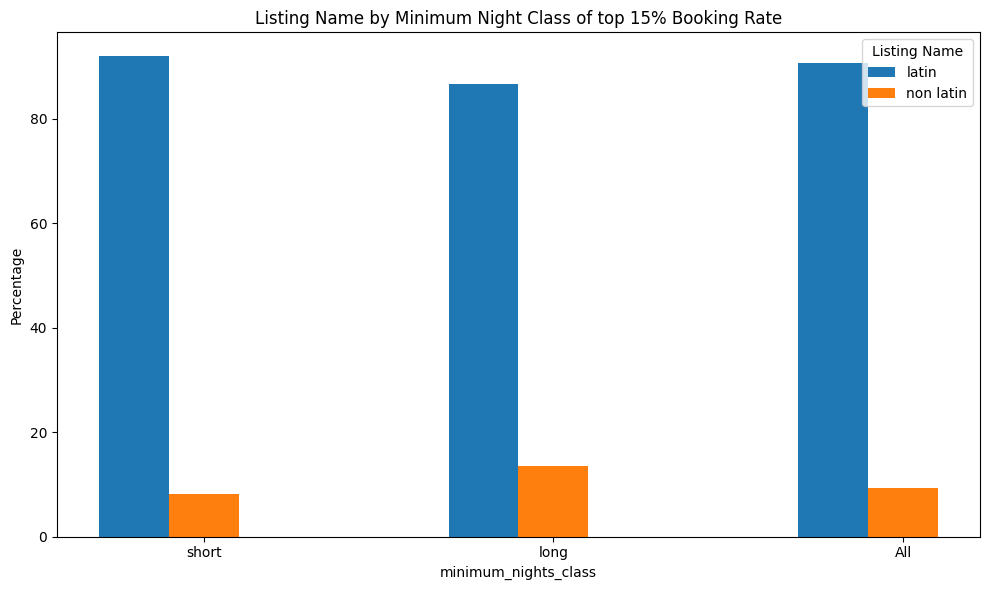

In [42]:
tab=pd.DataFrame(columns=['latin','non latin'])
for i in df['minimum_nights_class'].unique():
    a=df[df['booking_rate']=='top 15%']
    count=len(a[a['minimum_nights_class']==i])
    count2=len(a)
    if count!=0:
        la=len(a[(a['minimum_nights_class']==i)&(a['name_latin']=='latin')])/count*100
        nl=len(a[(a['minimum_nights_class']==i)&(a['name_latin']=='non latin')])/count*100
        tab.loc[i]=[la,nl]

tab.loc['All']=[len(a[(a['name_latin']=='latin')])/count2*100,len(a[(a['name_latin']=='non latin')])/count2*100]
display(tab)
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
# Define the bar width
bar_width = 0.2
index = np.arange(len(tab))  # The label locations
# Plot each product
for i, product in enumerate(tab.columns):
    ax.bar(index + i * bar_width, tab[product], bar_width, label=product)
# Adding labels, title, and legend
ax.set_ylabel('Percentage')
ax.set_xlabel('minimum_nights_class')
ax.set_title('Listing Name by Minimum Night Class of top 15% Booking Rate')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(tab.index)
ax.legend(title='Listing Name')
plt.tight_layout()
plt.show()

Dari tabel dan grafik diatas didapatkan bahwa penyewa jangka panjang maupun jangka pendek keduanya memiliki preferensi untuk menyewa listing dengan nama listing tulisan latin namun penyewa jangka panjang memiliki preferensi terhadap nama listing non latin dibandingkan dengan penyewa jangka pendek.

### e. Analisis Tingkat Booking berdasarkan Distrik

#### Minimum Night Class 'Short'

In [43]:
da=df[(df['booking_rate']=='top 15%')&(df['minimum_nights_class']=='short')]
distrik =pd.DataFrame(data=da.groupby('neighbourhood').count()['id']).reset_index()
distrik['id']=distrik['id']/len(da)*100
import plotly.express as px
bangkok = r'Bangkok-districts.geojson'
bangkok_loc = [13.7563,100.5018]
fig = px.choropleth_mapbox(distrik, geojson=bangkok, color='id',
                           locations='neighbourhood', featureidkey='properties.dname_e',
                           center={'lat': 13.7563, 'lon': 100.5018},
                           mapbox_style='open-street-map', zoom=10,
                           labels={'id':'Persentase',
                                    'neighbourhood': 'Ditrict'},color_continuous_scale='YlOrRd',opacity=0.7)
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})
display(distrik.sort_values('id',ascending=False).head(5))
fig.show()

,neighbourhood,id
20,Khlong Toei,26.619552
35,Vadhana,16.548881
30,Ratchathewi,8.421673
32,Sathon,7.361602
6,Bang Rak,5.535925


Didapatkan bahwa district dengan tingkat booking tertinggi untuk penyewa jangka pendek adalah :
1. Khlong Toei
2. Vadhana
3. Ratchathewi
4. Sathon
5. Bang Rak

#### Minimum Night Class 'Short'

In [44]:
da=df[(df['booking_rate']=='top 15%')&(df['minimum_nights_class']=='long')]
distrik =pd.DataFrame(data=da.groupby('neighbourhood').count()['id']).reset_index()
distrik['id']=distrik['id']/len(da)*100
import plotly.express as px
bangkok = r'Bangkok-districts.geojson'
bangkok_loc = [13.7563,100.5018]
fig = px.choropleth_mapbox(distrik, geojson=bangkok, color='id',
                           locations='neighbourhood', featureidkey='properties.dname_e',
                           center={'lat': 13.7563, 'lon': 100.5018},
                           mapbox_style='open-street-map', zoom=10,
                           labels={'id':'Persentase',
                                    'neighbourhood': 'Ditrict'},color_continuous_scale='YlGnBu',opacity=0.7)
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})
display(distrik.sort_values('id',ascending=False).head(5))
fig.show()

,neighbourhood,id
27,Vadhana,23.434705
15,Khlong Toei,16.636852
5,Bang Rak,7.155635
12,Huai Khwang,6.618962
20,Phra Khanong,5.903399


Didapatkan bahwa district dengan tingkat booking tertinggi untuk penyewa jangka panjang adalah :
1. Vadhana
2. Khlong Toei
3. Bang Rak
4. Huai Khwang
5. Phra Khanong

# 5. Saran dan Kesimpulan

## 5.1. Kesimpulan

### Statistika Deskriptif

1. District dengan listing terbanyak berasal dari Khlong Toei yaitu sebesar 1.887 atau 13,06% dari total listing.
2. Jenis kamar dengan listing terbanyak adalah tipe Entire home/apt yaitu sebesar 8.107 atau 56,10% dari total listing.
3. Nama listing mayoritas menggunakan tulisan latin yaitu sebesar 12.609 atau 87,26% dari total listing.
4. Listing mayoritas memiliki malam minimum sewa yang short yaitu sebesar 10.893 atau 75,38% dari total listing.
5. Didapatkan bahwa seluruh variabel numerikal tidak terdistribusi normal dengan skewness positif.
6. Terdapat hubungan berbanding lurus yang kuat yang antara variabel review per bulan, jumlah review, dan jumlah review 1 tahun terakhir.

### Analisis Harga

1. Distrik mempengaruhi harga listing, distrik dengan median harga terbesar adalah distrik Parthum Wan
2. Tipe kamar mempengaruhi harga listing, tipe rumah/apartemen memiliki median tertinggi diikuti dengan tipe kamar hotel namun dengan sebaran yang lebih kecil.
3. Minimum malam sewa mempengaruhi harga listing, listing dengan minimum malam sewa pendek memiliki median harga yang lebih besar dan dengan sebaran yang lebih luas dibandingkan minimum malam sewa pendek.

### Analisis Tingkat Booking Tinggi

1. Berdasarkan harga, penyewa jangka panjang maupun pendek memiliki preferensi untuk menyewa tempat dengan harga yang standard.
2. Berdasarkan harga, penyewa jangka pendek lebih suka untuk memesan tempat dengan harga premium dibandingkan budget.
3. Berdasarkan harga, penyewa jangka panjang lebih suka untuk memesan tempat dengan harga budget dibandingkan premium.
4. Berdasarkan tipe kamar, penyewa jangka panjang lebih tidak suka untuk menyewa kamar yang berbagi tempat dengan orang lain yaitu shared room dan private room dibandingkan penyewa jangka pendek.
4. Berdasarkan tipe kamar, penyewa jangka panjang maupun jangka pendek keduanya memiliki preferensi untuk menyewa tempat dengan tipe rumah/apartemen diikuti dengan private room, hotel room, dan yang terakhir shared room.
5. Berdasarkan nama listing, penyewa jangka panjang maupun jangka pendek keduanya memiliki preferensi untuk menyewa listing dengan nama listing tulisan latin namun penyewa jangka panjang memiliki preferensi yang lebih besar terhadap nama listing non latin dibandingkan dengan penyewa jangka pendek.
6. Berdasarkan distrik, lokasi dengan tingkat booking tertinggi untuk penyewa jangka pendek adalah Khlong Toei, Vadhana, Ratchathewi, Sathon, Bang Rak.
7. Berdasarkan distrik, lokasi dengan tingkat booking tertinggi untuk penyewa jangka panjang adalah Vadhana,Khlong Toei,Bang Rak,Huai Khwang,Phra Khanong.

## 5.2. Saran

### Saran untuk Host

1. Untuk memaksimalkan harga, host dapat mengatur minimum malam sewa rendah, namun akan meningkatkan perawatan tempat. Dan sebaliknya untuk menurunkan perawatan tempat, host dapat meningkatkan minimum malam sewa, namun dengan harga yang lebih rendah.
2. Apabila host memiliki tempat dengan kualitas yang diatas rata-rata lebih baik untuk mengatur minimum malam sewa yang rendah.
3. Apabila host memiliki tempat dengan kualitas yang dibawah rata-rata lebih baik untuk mengatur minimum malam sewa yang tinggi.
4. Apabila host memiliki tempat yang harus berbagi dengan orang lain seperti shared room dan private room lebih baik untuk mengatur minimum malam sewa yang rendah.
5. Lebih baik bagi host untuk menulis nama listing dengan bahasa inggris.
6. Apabila host ingin menentukan price untuk memaksimalkan booking gunakan harga diantara quartil 1 dan 3 atau lebih rendah berdasarkan daerah.
7. Apabila host memiliki tempat di district Ratchathewi atau Sathon, disarankan untuk mengatur minimum malam sewa yang rendah.
8. Apabila host memiliki tempat di district Huai Khwang atau Phra Khanong, disarankan untuk mengatur minimum malam sewa yang tinggi.


### Saran untuk Airbnb

1. Sediakan fitur penerjemah nama listing.
2. Mendorong orang-orang yang memiliki tempat tinggal kosong untuk disewakan di daerah yang tingkat bookingnya tinggi.
3. Menyediakan saran range harga dan minimum malam sewa kepada host berdasarkan lokasi.
4. Menyediakan informasi jarak secara otomatis ke tempat-tempat wisata terdekat agar host tidak terlalu mengandalkan nama listing.


In [45]:
df.to_excel('Airbnb Listings Bangkok_Clean.xlsx')